In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# Load Model    

In [2]:
# Load the model
model = keras.models.load_model('fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

In [3]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [15]:
# Load testing data
data_url = '/sit_5/sub_20.csv'
df = pd.read_csv('dataset' + data_url)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.950313,-0.376889,1.829859,0.756494,0.368029,-0.540620,0.215112,-0.055852,0.089058,-0.023294,0.095334,-0.042510
1,0.948267,-0.372756,1.827023,0.756615,0.364184,-0.543048,0.225804,-0.027221,0.112597,-0.014901,0.058347,-0.008725
2,0.948786,-0.369050,1.825867,0.757989,0.360730,-0.543438,0.112340,0.136125,0.121209,0.023475,0.012027,0.012753
3,0.953901,-0.366779,1.826610,0.761425,0.358611,-0.540027,-0.010778,0.292031,0.134036,0.018345,0.013704,0.011966
4,0.960233,-0.365938,1.830000,0.765076,0.357825,-0.535368,-0.140175,0.275233,0.184429,0.041992,-0.058463,0.005003
...,...,...,...,...,...,...,...,...,...,...,...,...
7932,0.916098,-0.560413,1.912348,0.671882,0.531536,-0.515766,-0.663011,0.285229,-1.037023,0.232247,0.057331,-0.276561
7933,0.917357,-0.585949,1.911330,0.661535,0.552990,-0.506501,-0.812901,-0.075352,-1.044017,0.180292,0.006275,0.047822
7934,0.917546,-0.612772,1.913666,0.649614,0.575137,-0.497180,-0.883112,0.037540,-0.976286,0.046812,0.051144,-0.115186
7935,0.920525,-0.637579,1.914031,0.639537,0.595252,-0.486453,-0.710825,0.131833,-0.996568,0.023427,0.006478,-0.105405


# Preprocessing Data

In [16]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [17]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

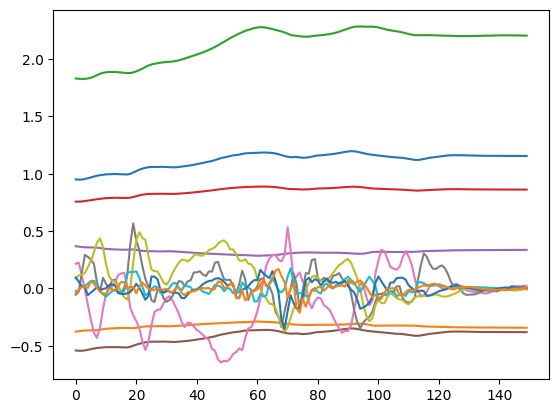

In [18]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

# Prediction

In [19]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


'sit'